Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
frog


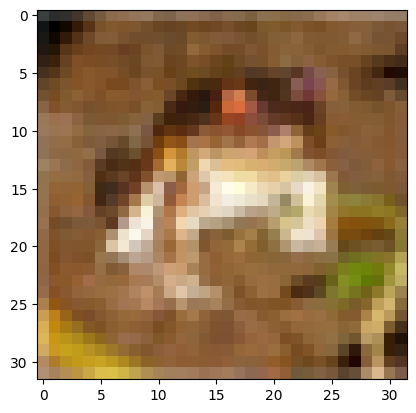

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

# 打印更紧凑
# torch.set_printoptions(edgeitems=2)
"""
`torch.manual_seed(123)`是PyTorch中用于设置随机数种子的函数，其中`123`是一个整数值，表示随机数种子。
在深度学习中，许多操作都会涉及到随机数生成，如参数初始化、数据扰动等。为了保证实验的可重复性，需要使用相同的随机数种子来生成随机数序列。这样可以确保每次运行实验时，得到的结果都是一样的。
因此，通过调用`torch.manual_seed()`函数，可以设置随机数种子，使得每次生成的随机数序列都是相同的。这样就能够保证实验的可重复性，方便进行调试和比较实验结果。
需要注意的是，`torch.manual_seed()`函数只在当前进程中生效，不会影响其他进程或者线程中的随机数种子。如果需要在多进程或者多线程中保持随机数种子一致，需要在每个进程或者线程中都调用`torch.manual_seed()`函数。
"""
torch.manual_seed(123)

# 常量
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

transform = transforms.Compose([transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

data_path = '../data-unversioned/p1ch7/'
# 标准集
cifar10_standard = torchvision.datasets.CIFAR10(data_path, train=True, download=True) # <1>
# 验证集合
cifar10_val_standard = torchvision.datasets.CIFAR10(data_path, train=False, download=True) # <2>

# 定义超参数
input_num = 3*32*32
hidden_num = 512
output_num = 2
learning_rate = 0.001

# 展示标准1
img_s_1, label_s_1 = cifar10_standard[0]
plt.imshow(img_s_1)
print(class_names[label_s_1])
plt.show()

In [2]:
loss = nn.NLLLoss()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


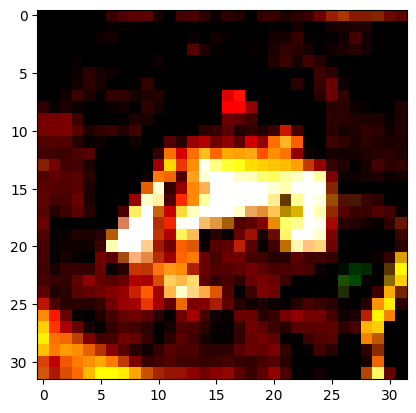

1
tensor([[-0.8320, -0.5712]], grad_fn=<LogSoftmaxBackward0>)


tensor(0.5712, grad_fn=<NllLossBackward0>)

In [4]:
label_map = {0: 0, 2: 1, 6: 2}
# class_names = ['airplane','bird','frog']
cifar2 = [(img, label_map[label])
          for img, label in trainset
          if label in [0, 2]]

cifar2_val = [(img, label_map[label])
              for img, label in testset
              if label in [0, 2]]

# model1 = nn.Sequential(
#             nn.Linear(input_num, hidden_num),
#             nn.Tanh(),
#             nn.Linear(hidden_num, output_num),
#             nn.LogSoftmax(dim=1))

model1 = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

optimizer = optim.SGD(model1.parameters(), lr=learning_rate)

img_1, label_1 = trainset[0]
plt.imshow(img_1.permute(1, 2, 0))
plt.show()

img, label = cifar2[0]
print(label)
out = model1(img.view(-1).unsqueeze(0))
print(out)
loss(out, torch.tensor([label]))


In [ ]:
# 定义全连接神经网络模型类
class Classifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.LogSoftmax = nn.LogSoftmax(dim=1)

    # nn.Tanh()
    def forward(self, x):
        # x = x.view(-1, 3072)
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.fc2(x)
        x = self.LogSoftmax(x)
        return x


# 创建模型对象、损失函数对象和优化器对象
model = Classifier(input_num, hidden_num, output_num)
criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 单次训练
# img, label = trainset[0]
img, label = cifar2[0]
out = model(img.view(-1).unsqueeze(0))
# out = model(img)
# 计算损失并进行反向传播和优化
t_label = torch.tensor([label])
print(out)
# print(loss(out, torch.tensor([label])))
# loss = loss(out, torch.tensor([label]))
print(criterion(out, torch.tensor([label])))